In [ ]:
import requests # for making standard html requests
from bs4 import BeautifulSoup # magical tool for parsing html data
import json # for parsing data
from pandas import DataFrame as df # premier library for data organization
import pandas as pd
from collections import defaultdict
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import urllib
import random

In [ ]:
def wordcloud_conferencias(url,color="negro"):
  link = url
  page = requests.get(link)
  soup = BeautifulSoup(page.text,"html.parser")

  incoherencias = soup.find_all("p", text= True)
  lineas = []

  for linea in range(len(incoherencias)):
    lineas.append(incoherencias[linea].text)

  palabras = []
  for linea in lineas:
    palabras.extend(linea.split())

  d=defaultdict(int)
 
  for palabra in palabras:
    d[palabra]+=1

  palabras_ban = ["para","Cuando","esta","este", "dónde", "esto","porque","estás", "Este","hasta",
                  "desde","después", "Desde","cuando","aquí","haga","como", "todo","Porque"
                  ,"Pero","pero", "quién","quien","estas","Quien","Quién", "that","it's","with", "vamos",
                "también","hacer","había","mucho","está","pues","Entonces","síguele",
                "estamos", "México,","pueblo,","Entonces,","Revolución,","donde","tiene",
                "tenemos","cuanto","Siguiente.","están","decir,"]

  arreglo_palabras= defaultdict(int)

  for palabra in sorted(d, key=d.get, reverse=True):
    if len(palabra)>3:
      if palabra not in palabras_ban: 
        arreglo_palabras[palabra]=d[palabra]
  
  def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

  wc = WordCloud(background_color="black", max_words=30,
                max_font_size=256,
               random_state=42, width=500, height=500,relative_scaling=0.5  )

  wc.generate_from_frequencies(arreglo_palabras)

  if color=="blanco":
    plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
    
  else:
    plt.imshow(wc, interpolation='antialiased' )
  
  plt.axis('off')
  plt.show()

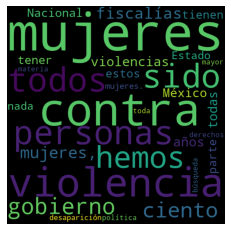

In [ ]:
conferencia1= "https://presidente.gob.mx/25-11-20-version-estenografica-de-la-conferencia-de-prensa-matutina-del-presidente-andres-manuel-lopez-obrador/"
wordcloud_conferencias(conferencia1)

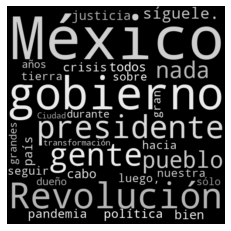

In [ ]:
wordcloud_conferencias(url,color="blanco")

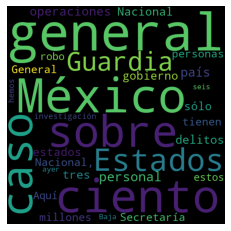

In [ ]:
url2= "https://presidente.gob.mx/19-11-20-version-estenografica-de-la-conferencia-de-prensa-matutina-del-presidente-andres-manuel-lopez-obrador/"
wordcloud_conferencias(url2)

In [ ]:
url = "https://presidente.gob.mx/20-11-20-version-estenografica-de-la-conferencia-de-prensa-matutina-del-presidente-andres-manuel-lopez-obrador/"
page = requests.get(url)
soup = BeautifulSoup(page.text,"html.parser")

In [ ]:
incoherencias = soup.find_all("p", text= True)

In [ ]:
lineas = []

for linea in range(len(incoherencias)):
  lineas.append(incoherencias[linea].text)



In [ ]:
palabras = []
for linea in lineas:
  palabras.extend(linea.split())


In [ ]:
d=defaultdict(int)
 
for palabra in palabras:
  d[palabra]+=1

palabras_ban = ["para","Cuando","esta","este", "dónde", "esto","porque","estás", "Este","hasta",
                  "desde","después", "Desde","cuando","aquí","haga","como", "todo","Porque"
                  ,"Pero","pero", "quién","quien","estas","Quien","Quién", "that","it's","with", "vamos",
                "también","hacer","había","mucho","está","pues","Entonces","síguele",
                "estamos", "México,","pueblo,","Entonces,","Revolución,"]

arreglo_palabras= defaultdict(int)

for palabra in sorted(d, key=d.get, reverse=True):
  if len(palabra)>3:
    if palabra not in palabras_ban: 
      arreglo_palabras[palabra]=d[palabra]

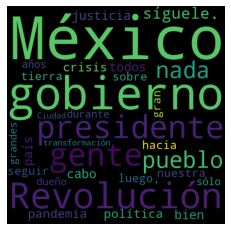

In [ ]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

wc = WordCloud(background_color="black", max_words=30,
                max_font_size=256,
               random_state=42, width=500, height=500,relative_scaling=0.5  )

wc.generate_from_frequencies(arreglo_palabras)
plt.imshow(wc, interpolation='antialiased' )
#plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
#           interpolation="bilinear")
plt.axis('off')
plt.show()